<a href="https://colab.research.google.com/github/AnnaBo1/python_for_DA/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

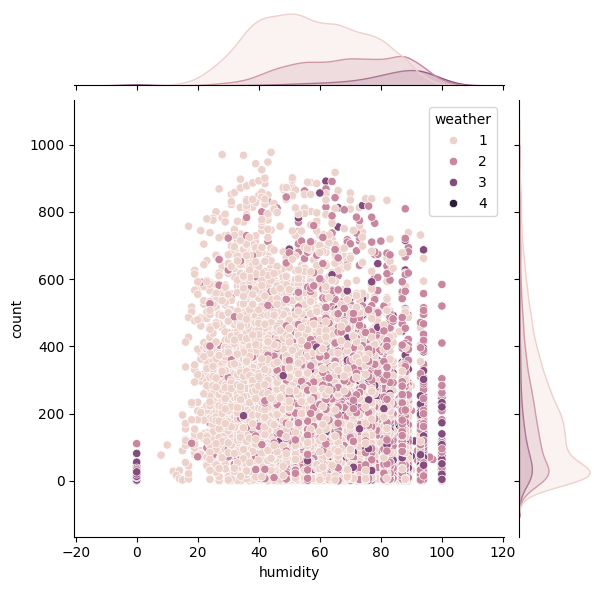

In [4]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather",)
plt.show()

Вологість коливається в межах від 0 до 100%, причому найбільша кількість поїздок на велосипедах спостерігається в середньому діапазоні вологості (від 40% до 80%). Цей діапазон охоплює більшість точок на графіку.
Кількість поїздок зосереджена в діапазоні 200–800. Це свідчить про те, що хоча вологість впливає на кількість поїздок, вона не є єдиним фактором.
Кількість поїздок дещо знижується при дуже високій вологості (понад 80%)
На графіку зображено 4 погодні умови що зображені різними кольорами:
1.Ясно, Мало хмарно, частково хмарно
2.Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
3.Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
4.Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
Точки, що відповідають ясній погоді (колір 1), показують найбільшу кількість поїздок, особливо в діапазоні середньої вологості (40-80%).
Погодні умови з сильними опадами або поганою видимістю (колір 4) значно знижують кількість поїздок. Ці умови найчастіше трапляються при високій вологості і дорівнюють меньшій кількості поїздок до 400.
Оскільки вплив погоди є значним на кількість поїздок, сезонне планування може допомогти оптимізувати роботу сервісу. Наприклад у теплі місяці і в ясні дні потрібно мати більше велосипедів також можна проводити акції та рекламну компанію для збільшення користувачів.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [5]:
filtered_spring_summer = df[df['season'].isin([1, 2])] #Фільтруємо , залишаючи тільки ті рядки, де значення змінної season дорівнює 1 (весна) або 2 (літо)
filtered_spring_summer

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


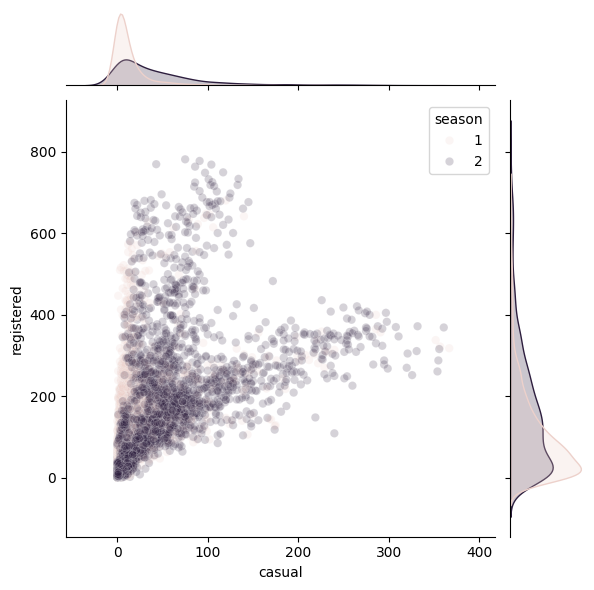

In [6]:
sns.jointplot(data=filtered_spring_summer, x="casual", y="registered", hue="season", alpha=0.2)
plt.show()

Більшість даних концентрується біля низьких значень осі casual (0-100) і ширше розподіляється на осі registered (0-800).
Це може вказувати на те, що зареєстровані користувачі більш активно користуються сервісом, ніж неформальні (casual) користувачі.
Літній сезон (сезон 2) має більше спостережень із значенням casual, що перевищує 100, ніж весняний сезон. Це може свідчити про те, що влітку люди частіше орендують велосипеди, не будучи зареєстрованими користувачами.
Оскільки зареєстровані користувачі складають значну частину оренди велосипедів, варто сфокусуватися на їхньому обслуговуванні та залученні нових користувачів.Літній період показує зростання використання велосипедів серед casual користувачів.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


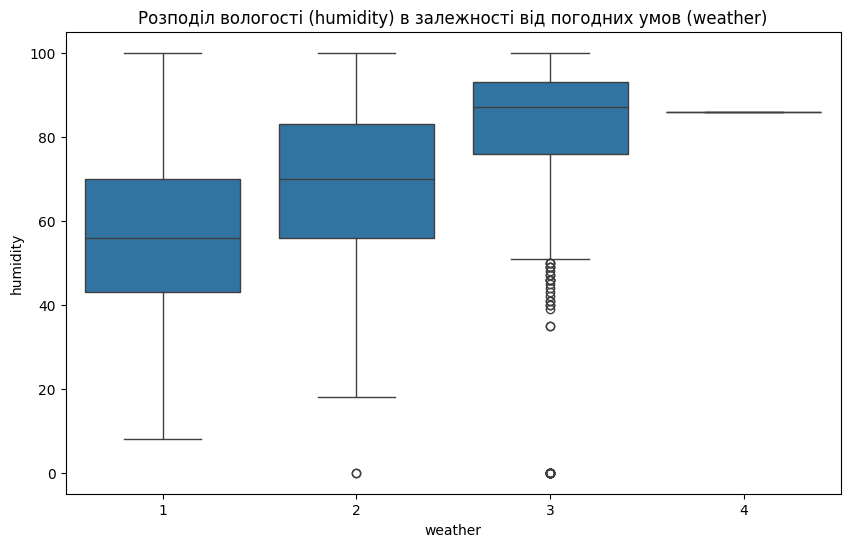

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='humidity', data=df) #створює ящик з вусами (box plot).
plt.title('Розподіл вологості (humidity) в залежності від погодних умов (weather)')
plt.xlabel('weather')
plt.ylabel('humidity')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [10]:
filtered_df = df[['registered', 'casual', 'count', 'workingday']]
filtered_df

,registered,casual,count,workingday
0,13,3,16,0
1,32,8,40,0
2,27,5,32,0
3,10,3,13,0
4,1,0,1,0
...,...,...,...,...
10881,329,7,336,1
10882,231,10,241,1
10883,164,4,168,1
10884,117,12,129,1


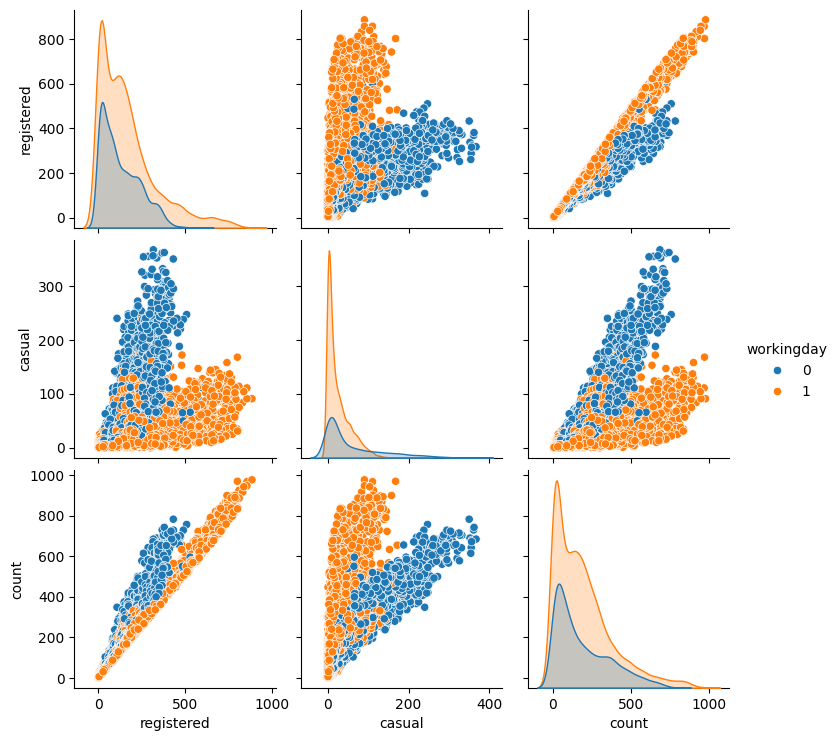

In [13]:
sns.pairplot(filtered_df, hue='workingday') # hue=...використовується для відокремлення робочих днів і святкових за кольором.
plt.show()

 0-вихідний(сині точки)
 1-робочі дні(помаранчеві)
На графіку "registered vs count" помаранчеві точки (які представляють робочі дні) досягають значень до 800 зареєстрованих користувачів, що перевищує максимум синіх точок (вихідних), які зосереджені в межах до 600.
У робочі дні більше зареєстрованих користувачів орендують велосипеди, що призводить до більшої загальної кількості взятих велосипедів.
Графік "casual vs count":
У робочі дні (помаранчеві точки) кількість неформальних  користувачів рідко перевищує 100, що призводить до більш низької загальної кількості оренд (зосереджено нижче 500).
У святкові дні (сині точки) кількість неформальних х користувачів може досягати 300, що також підвищує загальну кількість взятих велосипедів.
Незареєстровані користувачі є більш активними у святкові або вихідні дні, що сприяє збільшенню загальної кількості оренд, але їх активність не така значна в робочі дні.
Графік "registered vs casual":
У робочі дні(помаранчеві точки) кількість неформальних не перевищує 200, тоді як кількість зареєстрованих робочі дні(помаранчеві точки) досягає 800.
у святкові або вихідні дні(сині точки) кількість неформальних досягає 400, а кількість зареєстрованих зменшилась в порівняні з робочими днями.
У святкові дні активність серед неформальних користувачів значно вища, ніж у робочі дні. Це вказує на те, що у святкові дні більше людей спонтанно вирішують взяти велосипед, навіть якщо вони не зареєстровані.


5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [16]:
df['datetime'] = pd.to_datetime(df['datetime']) #s pandas.datetime  в нових версіях його замінили на pandas.Timestamp
print(df['datetime'].dtype)

datetime64[ns]


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [17]:
df['date'] = df.datetime.dt.date

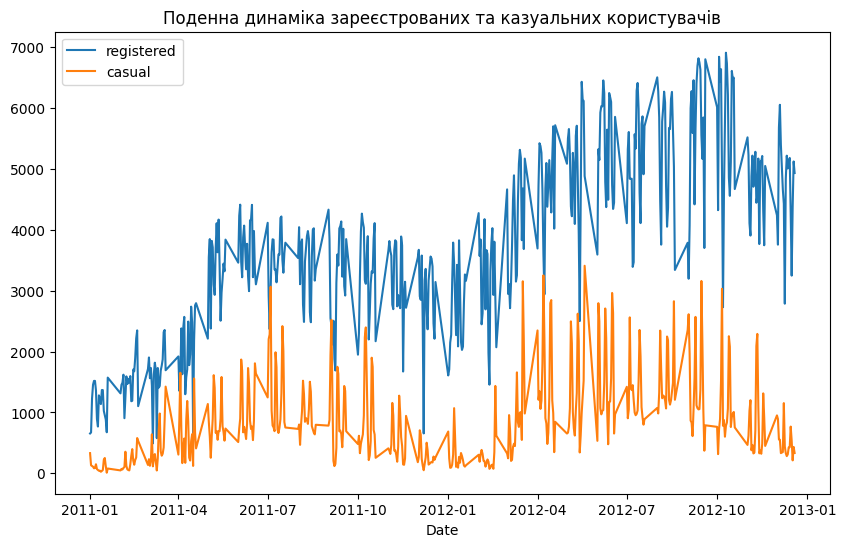

In [21]:
df_viz = df[['date', 'registered', 'casual']] #нова змінна df_viz, вибравши необхідні колонки
df_viz = df_viz.groupby('date').sum() #групування даних за датою і підсумок

df_viz.plot(y=['registered', 'casual'], figsize=(10, 6))
plt.title('Поденна динаміка зареєстрованих та казуальних користувачів')
plt.xlabel('Date')
plt.legend(['registered', 'casual'])
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
